In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Train_file.csv", sep=';')
links=df.movie_imdb_link.isna()
skip=[]
for i in range(len(links)):
    if links[i]==True :
        skip.append(i)
df=df.drop(index=skip)
df.head()

,id,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0.0


In [3]:
df.columns

Index(['id', 'color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [4]:
df=df.drop('id',1)
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [5]:
df.shape

(4499, 28)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4499 entries, 0 to 4499
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4480 non-null   object 
 1   director_name              4403 non-null   object 
 2   num_critic_for_reviews     4452 non-null   float64
 3   duration                   4484 non-null   float64
 4   director_facebook_likes    4403 non-null   float64
 5   actor_3_facebook_likes     4479 non-null   float64
 6   actor_2_name               4488 non-null   object 
 7   actor_1_facebook_likes     4494 non-null   float64
 8   gross                      3706 non-null   float64
 9   genres                     4499 non-null   object 
 10  actor_1_name               4494 non-null   object 
 11  movie_title                4499 non-null   object 
 12  num_voted_users            4499 non-null   float64
 13  cast_total_facebook_likes  4499 non-null   float

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4452.0,1.383441e+02,1.209120e+02,1.00,49.00,108.50,192.00,8.130000e+02
duration,4484.0,1.070544e+02,2.547244e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4403.0,6.991083e+02,2.852613e+03,0.00,7.00,49.00,197.00,2.300000e+04
actor_3_facebook_likes,4479.0,6.370319e+02,1.654868e+03,0.00,133.00,370.00,633.50,2.300000e+04
actor_1_facebook_likes,4494.0,6.544425e+03,1.553906e+04,0.00,610.00,982.00,11000.00,6.400000e+05
gross,3706.0,4.771223e+07,6.712885e+07,162.00,5011870.25,25220700.00,61684354.50,7.605058e+08
num_voted_users,4499.0,8.382912e+04,1.408754e+05,5.00,8301.00,33987.00,96112.50,1.689764e+06
cast_total_facebook_likes,4499.0,9.658186e+03,1.864101e+04,0.00,1400.00,3059.00,13582.00,6.567300e+05
facenumber_in_poster,4490.0,1.384410e+00,2.047580e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,4479.0,2.703188e+02,3.799290e+02,1.00,64.00,155.00,322.00,5.060000e+03


In [8]:
df.describe(include = 'object')

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,4480,4403,4488,4499,4494,4499,4479,4355,4499,4487,4494,4223
unique,2,2270,2851,863,1985,4499,3307,4348,4499,46,60,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,Space Battleship Yamato,Steve Coogan,based on novel,http://www.imdb.com/title/tt1233192/?ref_=fn_t...,English,USA,R
freq,4292,24,17,214,46,1,8,4,1,4192,3406,1890


In [9]:
#Affiche le nombre de valeurs manquantes et les pourcentages
x=df.isna().sum()
y=df.isna().sum()*100/len(df)
result = pd.concat([x, y], axis=1)
result.columns=["nombre de données manquantes","pourcentage de données manquantes"]
result

,nombre de données manquantes,pourcentage de données manquantes
color,19,0.422316
director_name,96,2.133808
num_critic_for_reviews,47,1.044677
duration,15,0.333407
director_facebook_likes,96,2.133808
actor_3_facebook_likes,20,0.444543
actor_2_name,11,0.244499
actor_1_facebook_likes,5,0.111136
gross,793,17.626139
genres,0,0.000000


<AxesSubplot:>

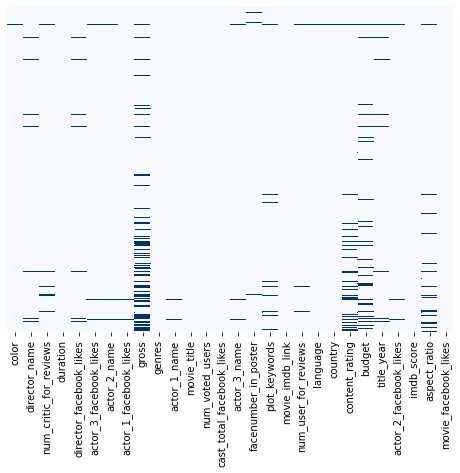

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),cmap='Blues',cbar=False,yticklabels=False)

array([[<AxesSubplot:title={'center':'num_critic_for_reviews'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>],
       [<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'title_year'}>],
       [<AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'imdb_score'}>,
        <AxesSubplot:title={'center':'aspect_ratio'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>]],
      dtype=object)

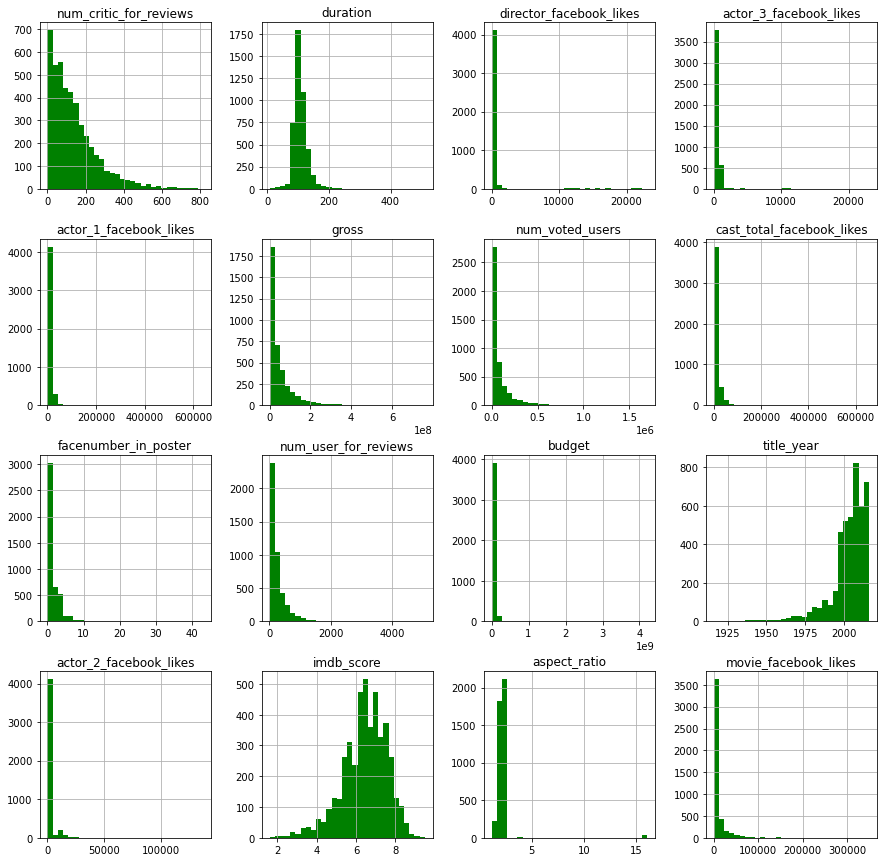

In [11]:
df.hist(bins=30,figsize=(15,15),color='g')

In [12]:
df.groupby('color')['color'].count() 

color
 Black and White     188
Color               4292
Name: color, dtype: int64

In [13]:
df['color']=df['color'].fillna(0)   
df['color'] = df['color'].astype('category').cat.codes

In [14]:
df['genres_first'] = df.genres.apply(lambda x: x.split('|')[0] if '|' in x else x)
df['nombre_genres'] = df.genres.apply(lambda x: len(x.split('|')))

<AxesSubplot:>

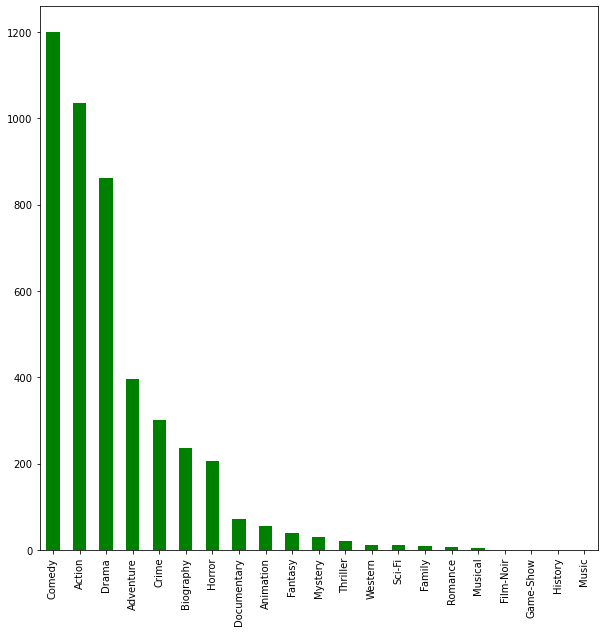

In [15]:
df.genres_first.value_counts().plot(kind='bar',figsize=(10,10),color='g')

<AxesSubplot:xlabel='imdb_score', ylabel='genres_first'>

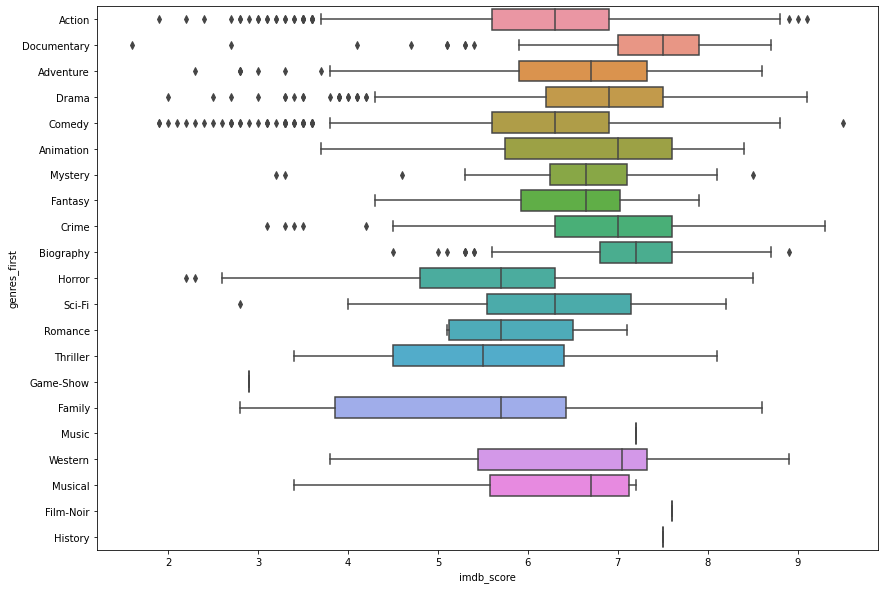

In [16]:
#Comparaison premier genre et imdb score
plt.figure(figsize=(14,10))
sns.boxplot(x='imdb_score',y='genres_first',data=df)

In [19]:
df.groupby('country')['country'].count().sort_values(ascending=False)

country
USA                   3406
UK                     392
France                 138
Canada                 115
Germany                 84
Australia               49
India                   32
Spain                   29
China                   28
Japan                   20
Italy                   18
Mexico                  17
Hong Kong               16
South Korea             13
Ireland                 12
Denmark                 11
Russia                  10
New Zealand             10
South Africa             8
Brazil                   7
Sweden                   6
Norway                   6
Netherlands              4
Argentina                4
Thailand                 4
Romania                  4
Poland                   4
West Germany             3
Iceland                  3
Israel                   3
Iran                     3
Belgium                  3
Greece                   2
Taiwan                   2
Switzerland              2
Czech Republic           2
Bulgaria            

<AxesSubplot:>

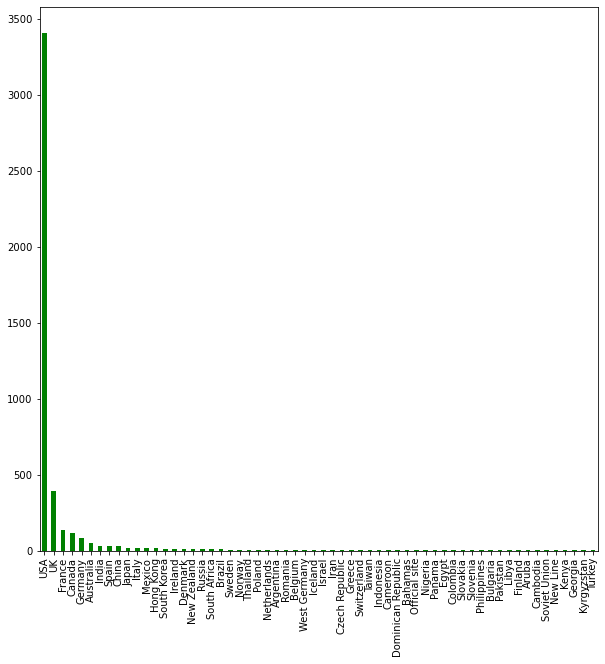

In [20]:
df.country.value_counts().plot(kind='bar',figsize=(10,10),color='g')

In [21]:
df.groupby('language')['language'].count().sort_values(ascending=False)

language
English       4192
French          64
Spanish         40
Hindi           25
Mandarin        24
German          18
Japanese        16
Cantonese       10
Russian         10
Italian          9
Portuguese       7
Korean           7
Swedish          5
Danish           5
Arabic           4
Hebrew           4
Dutch            3
Norwegian        3
Persian          3
Polish           3
Chinese          3
Thai             3
None             2
Romanian         2
Indonesian       2
Icelandic        2
Zulu             2
Dari             1
Filipino         1
Czech            1
Dzongkha         1
Bosnian          1
Aramaic          1
Kannada          1
Greek            1
Vietnamese       1
Kazakh           1
Maya             1
Mongolian        1
Panjabi          1
Slovenian        1
Swahili          1
Tamil            1
Telugu           1
Urdu             1
Aboriginal       1
Name: language, dtype: int64

<AxesSubplot:>

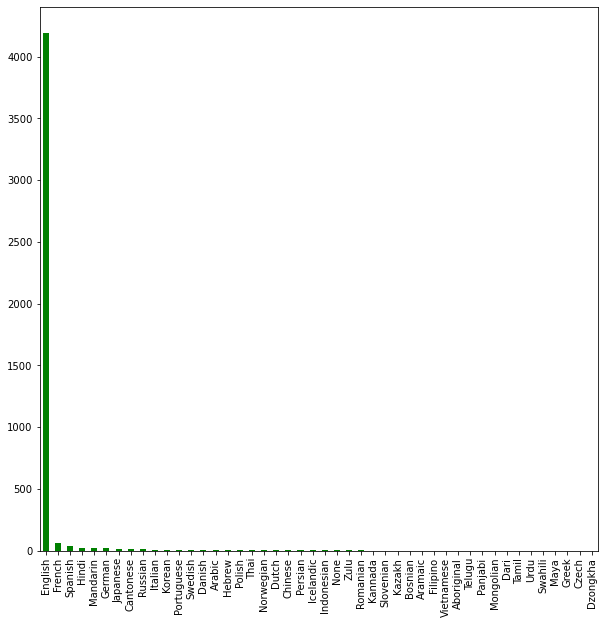

In [22]:
df.language.value_counts().plot(kind='bar',figsize=(10,10),color='g')

<AxesSubplot:>

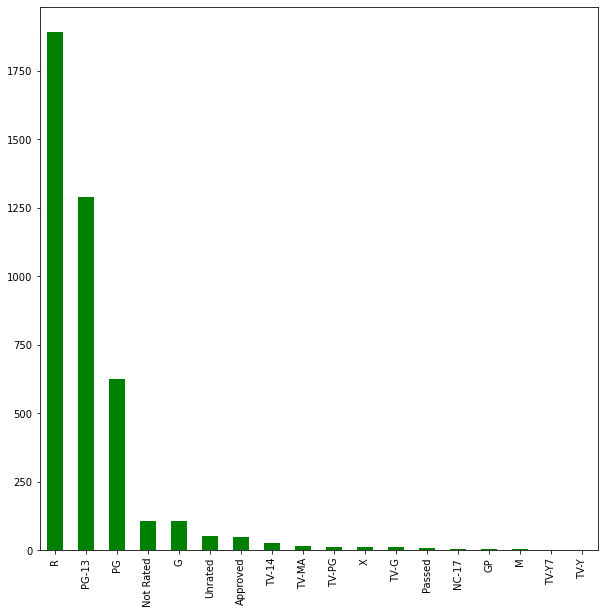

In [23]:
df.content_rating.value_counts().plot(kind='bar',figsize=(10,10),color='g')

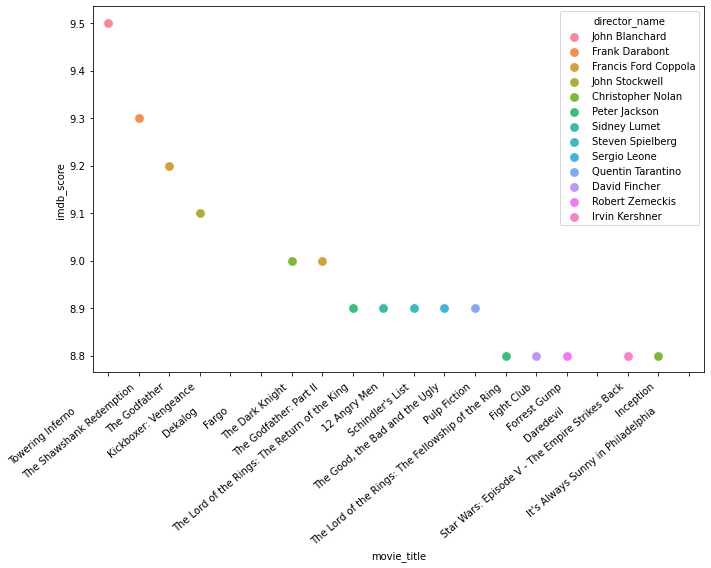

In [24]:
plt.figure(figsize=(10,8))
movie_df= df.sort_values(by ='imdb_score' , ascending=False)
movie_df_new=movie_df.head(20)
ax=sns.pointplot(x=movie_df_new['movie_title'], y=movie_df_new['imdb_score'], hue=movie_df_new['director_name'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

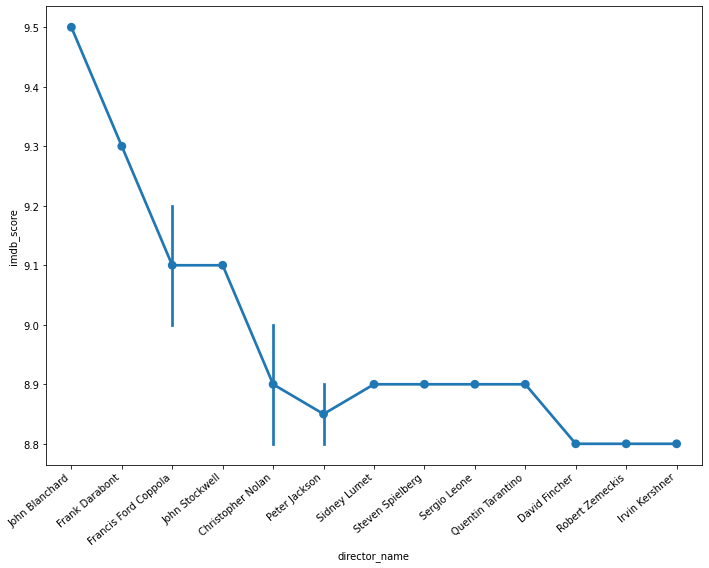

In [25]:
plt.figure(figsize=(10,8))
movie_df= df.sort_values(by ='imdb_score' , ascending=False)
movie_df_new=movie_df.head(20)

ax=sns.pointplot(x=movie_df_new['director_name'], y=movie_df_new['imdb_score'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

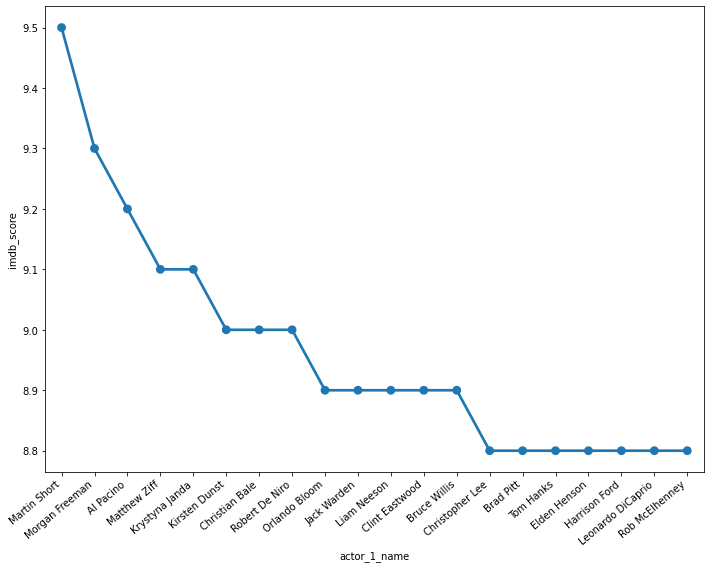

In [26]:
plt.figure(figsize=(10,8))
movie_df= df.sort_values(by ='imdb_score' , ascending=False)
movie_df_new=movie_df.head(20)

ax=sns.pointplot(x=movie_df_new['actor_1_name'], y=movie_df_new['imdb_score'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [27]:
from collections import Counter
def most_common(df,colonne,x_most_common):
    df[colonne]=df[colonne].apply(lambda x:str(x).split('|'))
    flat_list=[item for sublist in list(df[colonne]) for item in sublist if item != "nan"]
    a=list(dict(Counter(flat_list).most_common(x_most_common)).keys())
    df[colonne]=df[colonne].apply(lambda x: len(set(x).intersection(set(a)))) 
    return df

In [28]:
df=most_common(df,'plot_keywords',50)
df=most_common(df,'content_rating',3)
df=most_common(df,'language',2)
df=most_common(df,'country',3)

In [30]:
#On a testé pour chaque variable chaque quantile et on garde le quantile avec le meilleur score 

df['duration']=df['duration'].fillna(df['duration'].quantile(0.7))
df['actor_3_facebook_likes']=df['actor_3_facebook_likes'].fillna(df['actor_3_facebook_likes'].quantile(0.5))
df['actor_1_facebook_likes']=df['actor_1_facebook_likes'].fillna(df['actor_1_facebook_likes'].quantile(0.6))
df['gross']=df['gross'].fillna(df['gross'].quantile(0.3))
df['budget']=df['budget'].fillna(df['budget'].quantile(0.3))
df['title_year']=df['title_year'].fillna(df['title_year'].quantile(0.5))
df['actor_2_facebook_likes']=df['actor_2_facebook_likes'].fillna(df['actor_2_facebook_likes'].quantile(0.2))
df=df.fillna(df.quantile(0.1))


df["profit"]=df['gross'].sub(df['budget'], axis = 0)
df['profit_pourcentage']=(df["profit"]/df["gross"])*100
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres_first,nombre_genres,profit,profit_pourcentage
0,2,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,237000000.0,2009.0,936.0,7.9,1.78,33000.0,Action,4,523505847.0,68.836532
1,2,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,300000000.0,2007.0,5000.0,7.1,2.35,0.0,Action,3,9404152.0,3.039439
2,2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,245000000.0,2015.0,393.0,6.8,2.35,85000.0,Action,3,-44925825.0,-22.454585
3,2,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,Action,2,198130642.0,44.212697
4,0,Doug Walker,17.0,114.0,131.0,370.0,Rob Walker,131.0,8000000.0,Documentary,...,8000000.0,2005.0,12.0,7.1,1.85,0.0,Documentary,1,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,2,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,7000.0,1992.0,20.0,6.9,1.37,0.0,Action,5,2033920.0,99.657017
4496,2,Anthony Vallone,17.0,84.0,2.0,2.0,John Considine,45.0,8000000.0,Crime|Drama,...,3250.0,2005.0,44.0,7.8,1.85,4.0,Crime,2,7996750.0,99.959375
4497,2,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,8000000.0,Comedy|Drama,...,8000000.0,2013.0,470.0,7.7,1.85,84.0,Comedy,2,0.0,0.000000
4498,2,NaN,43.0,43.0,0.0,319.0,Valorie Curry,841.0,8000000.0,Crime|Drama|Mystery|Thriller,...,8000000.0,2005.0,593.0,7.5,16.00,32000.0,Crime,4,0.0,0.000000


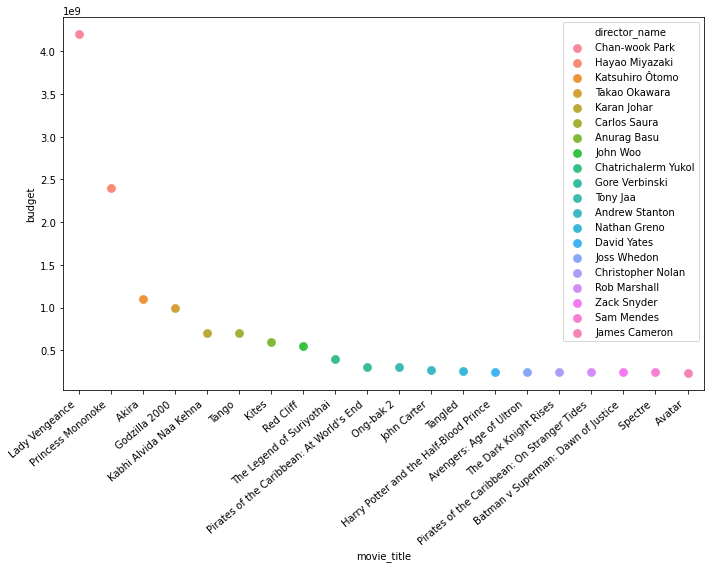

In [31]:
plt.figure(figsize=(10,8))
movie_df= df.sort_values(by ='budget' , ascending=False)
movie_df_new=movie_df.head(20)
ax=sns.pointplot(x=movie_df_new['movie_title'], y=movie_df_new['budget'], hue=movie_df_new['director_name'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

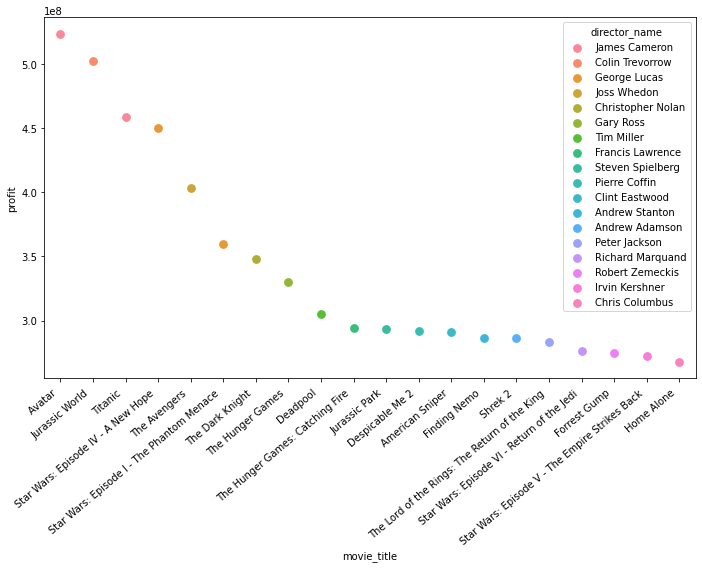

In [32]:
plt.figure(figsize=(10,8))
movie_df= df.sort_values(by ='profit' , ascending=False)
movie_df_new=movie_df.head(20)
ax=sns.pointplot(x=movie_df_new['movie_title'], y=movie_df_new['profit'], hue=movie_df_new['director_name'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

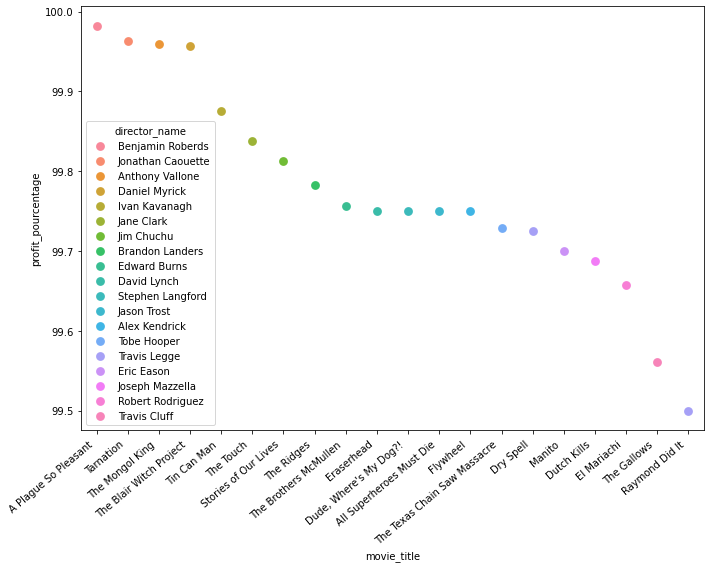

In [33]:
plt.figure(figsize=(10,8))
movie_df= df.sort_values(by ='profit_pourcentage' , ascending=False)
movie_df_new=movie_df.head(20)
ax=sns.pointplot(x=movie_df_new['movie_title'], y=movie_df_new['profit_pourcentage'], hue=movie_df_new['director_name'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [34]:
df=most_common(df,'director_name',20)

In [35]:
movie_train=df

In [36]:
df1=pd.read_csv('train_file_scrapping.csv',sep=';')
df1

,note_site,nombre_votes,main production,gross_world,metascore,commentaire,movie_imdb_link
0,7.8,1112736,Twentieth Century Fox,2790439092,83,"Forgive me, I'm going to jump from professiona...",http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,7.1,591916,Walt Disney Pictures,960996492,50,Less than a year after the previous installmen...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,6.8,381973,B24,880674609,60,"What do you get when you put Voldemort, Moriar...",http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,8.4,1504219,Warner Bros.,1081141435,78,"Not being a huge fan of superhero movies, I di...",http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,6.6,29,Channel Awesome,0,0,,http://www.imdb.com/title/tt5289954/?ref_=fn_t...
...,...,...,...,...,...,...,...
4494,6.9,63027,Columbia Pictures,2040920,73,It is so well-established now in other comment...,http://www.imdb.com/title/tt0104815/?ref_=fn_t...
4495,7.8,36,Vallonicka Films,0,0,I saw this film at the SMMASH Film Festival an...,http://www.imdb.com/title/tt0430371/?ref_=fn_t...
4496,7.7,1170,Front Street Pictures,0,0,"The script is fresh and unique, clever and com...",http://www.imdb.com/title/tt3000844/?ref_=fn_t...
4497,7.4,83449,Bonanza Productions,0,0,The writing was good creating tension and sett...,http://www.imdb.com/title/tt2071645/?ref_=fn_t...


In [37]:
df1=df1.drop('note_site',1).drop('commentaire',1).drop('nombre_votes',1)
df1=df1.replace(0,df1.quantile(0.4))
movie_scrap=df1

In [38]:
movies=pd.merge(movie_train,movie_scrap)
movies=movies.drop('movie_imdb_link',1)

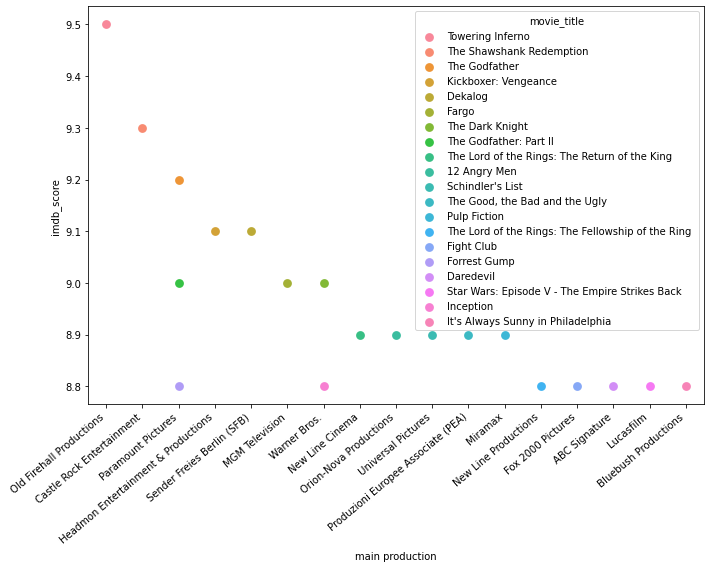

In [39]:
plt.figure(figsize=(10,8))
movie_df= movies.sort_values(by ='imdb_score' , ascending=False)
movie_df_new=movie_df.head(20)
ax=sns.pointplot(x=movie_df_new['main production'], y=movie_df_new['imdb_score'], hue=movie_df_new['movie_title'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [40]:
movies=most_common(movies,'main production',8)

<AxesSubplot:>

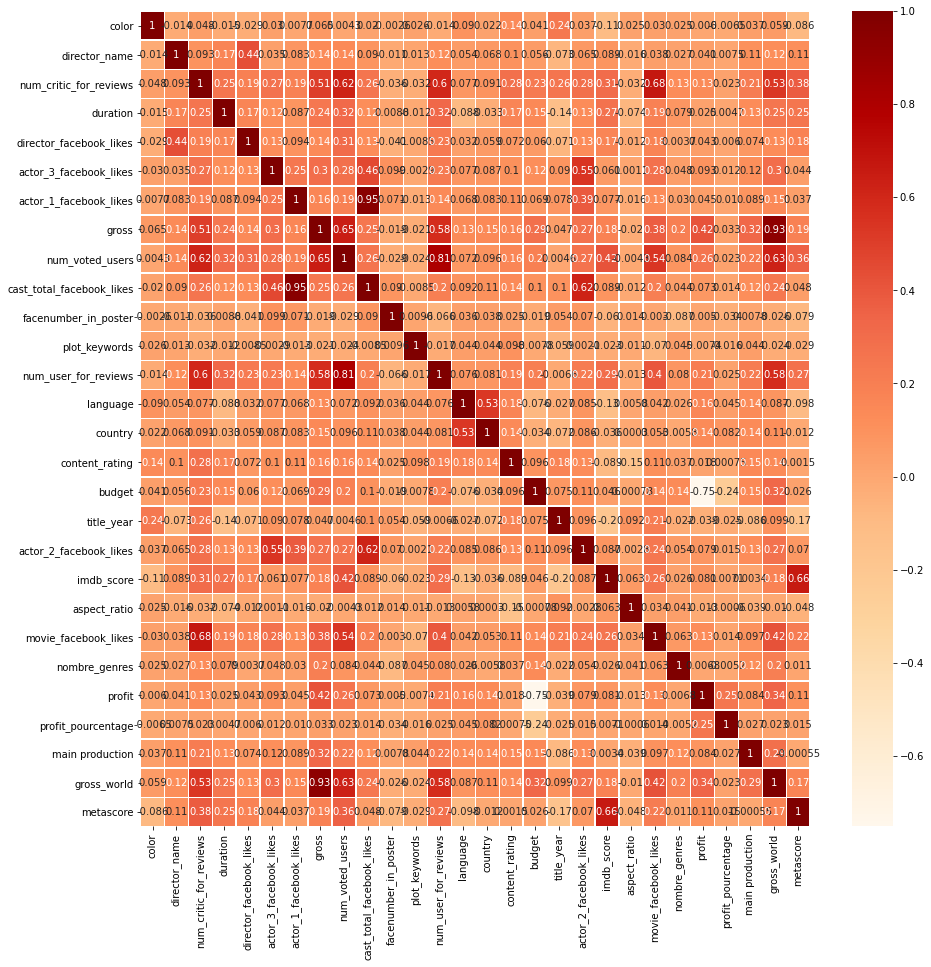

In [41]:
correlations = movies.corr()
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, annot=True, cmap="OrRd", linewidths=.5)

In [42]:
movies=movies.join(df.genres.str.get_dummies("|"))
movies=movies.fillna(0)
movies=movies.drop(columns=['num_user_for_reviews','cast_total_facebook_likes','num_critic_for_reviews','genres','genres_first','movie_title','actor_1_name','actor_2_name','actor_3_name','profit','profit_pourcentage','gross'])

In [44]:
x=movies.isna().sum()
y=movies.isna().sum()*100/len(df)
result = pd.concat([x, y], axis=1)
result.columns=["nombre de données manquantes","pourcentage de données manquantes"]
result

,nombre de données manquantes,pourcentage de données manquantes
color,0,0.0
director_name,0,0.0
duration,0,0.0
director_facebook_likes,0,0.0
actor_3_facebook_likes,0,0.0
actor_1_facebook_likes,0,0.0
num_voted_users,0,0.0
facenumber_in_poster,0,0.0
plot_keywords,0,0.0
language,0,0.0


In [48]:
movies.isna().sum().sum()

0

In [45]:
movies.to_csv(r'train_file_prediction.csv',index=None,sep=';')